
 Sells of Video game analyses
 
 
        The fact of Spread of video game it's not hiding from everyone now, so its turn out high selling in this industry  , the competition between the publisher that responsible of improve the gams is so increase also they have to satisfaction the audience in different platform .
I download  the data from kaggle to understand the increase sells that happing in this industry throw the years according the information 

In [29]:
# Data Processiong library
import pandas as pd
import numpy as np

# Visualizations library
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score ,mean_squared_error

In [30]:
df=pd.read_csv('data_sit.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


- cleaning data :

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  object 
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16596 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [32]:
df.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16596.000000
mean,8300.605254,0.263768,0.145958,0.077801,0.048070,0.537498
std,4791.853933,0.816594,0.505120,0.309294,0.188588,1.555113
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [33]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [34]:
df.isna().head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [35]:
df.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [37]:
df.notnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16593,True,True,True,True,True,True,True,True,True,True,True
16594,True,True,True,True,True,True,True,True,True,True,True
16595,True,True,True,True,True,True,True,True,True,True,True
16596,True,True,True,True,True,True,True,True,True,True,True


In [38]:
df.dropna()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [39]:
# delete rows that contain null values in the All feature
df.isna().sum(axis=1).shape
df.dropna(inplace=True)
df.shape
df.isna().sum(axis=0)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [40]:
nan = df[df.isna().any(axis=1)] 
nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      object 
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 0.0+ bytes


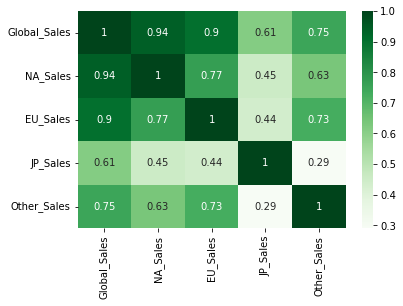

In [41]:
#Correlation of total sales in different countries.
c=df[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
c
sns.heatmap(c.corr(), annot=True ,cmap=  "Greens")
plt.show()

1-what is the different between country total sells  ?

C:\Users\Shodz\AppData\Local\Temp/ipykernel_1556/3084880447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby([df['Year']])['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().plot(kind = 'bar', figsize = (20,20))


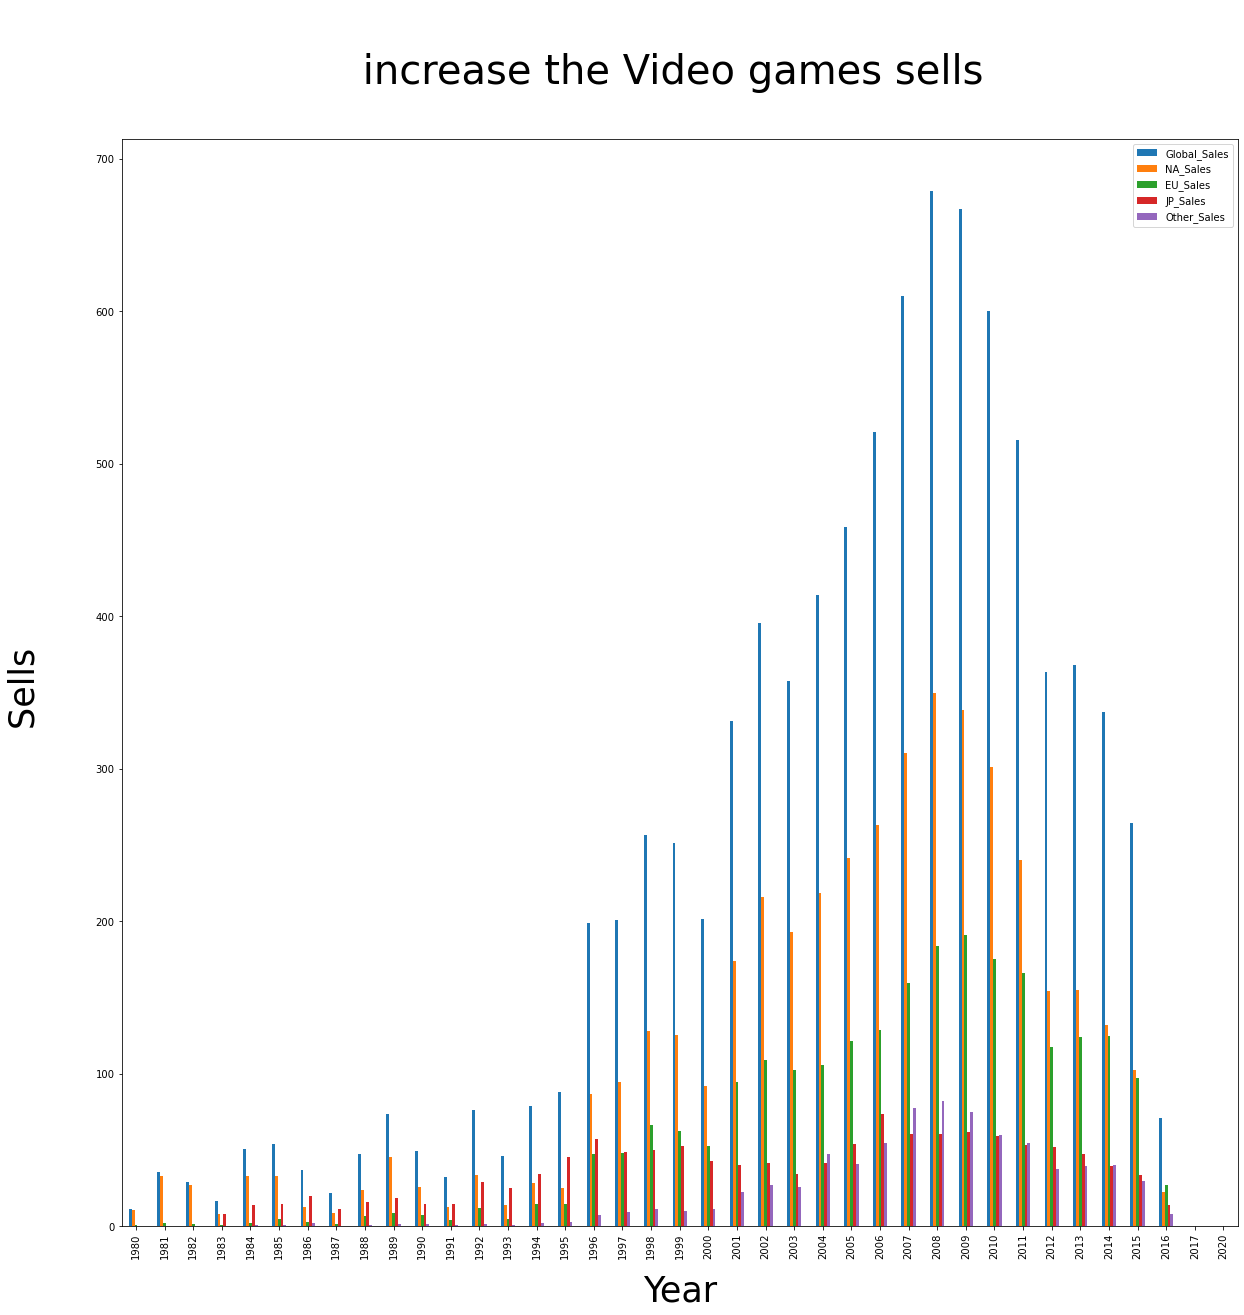

In [42]:
df.groupby([df['Year']])['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().plot(kind = 'bar', figsize = (20,20))
plt.title('\n increase the Video games sells  \n',color='black', fontsize=40)
plt.xlabel('Year',color='black',labelpad=15, fontsize=35)
plt.ylabel('Sells \n',color='black',labelpad=15, fontsize=35)
plt.show();

The result show to as is the higst total sells is glopal sells the north amerca , so let's take colse close look to it :

2- what is the highest years the sells is increase between Global & North America?

C:\Users\Shodz\AppData\Local\Temp/ipykernel_1556/1096601483.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby([df['Year']])['Global_Sales','NA_Sales'].sum().plot(kind = 'bar', figsize = (17,7))


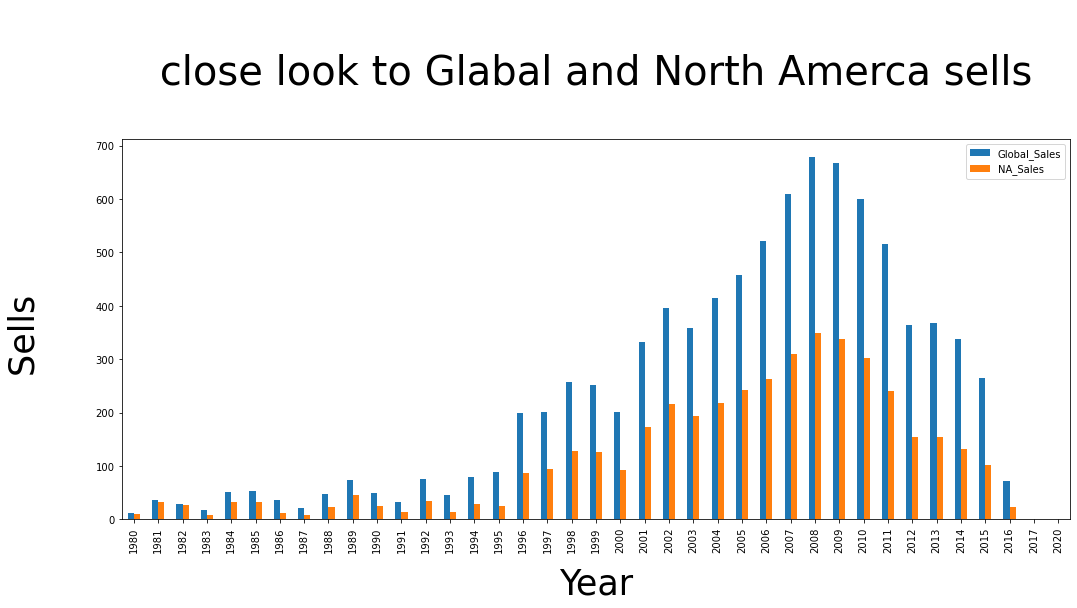

In [43]:
df.groupby([df['Year']])['Global_Sales','NA_Sales'].sum().plot(kind = 'bar', figsize = (17,7))
plt.title('\n close look to Glabal and North Amerca sells \n',color='black', fontsize=40)
plt.xlabel('Year',color='black',labelpad=15, fontsize=35)
plt.ylabel('Sells \n',color='black',labelpad=15, fontsize=35)
plt.show();

3- which was popular platform and  Publisher according to the sells value?

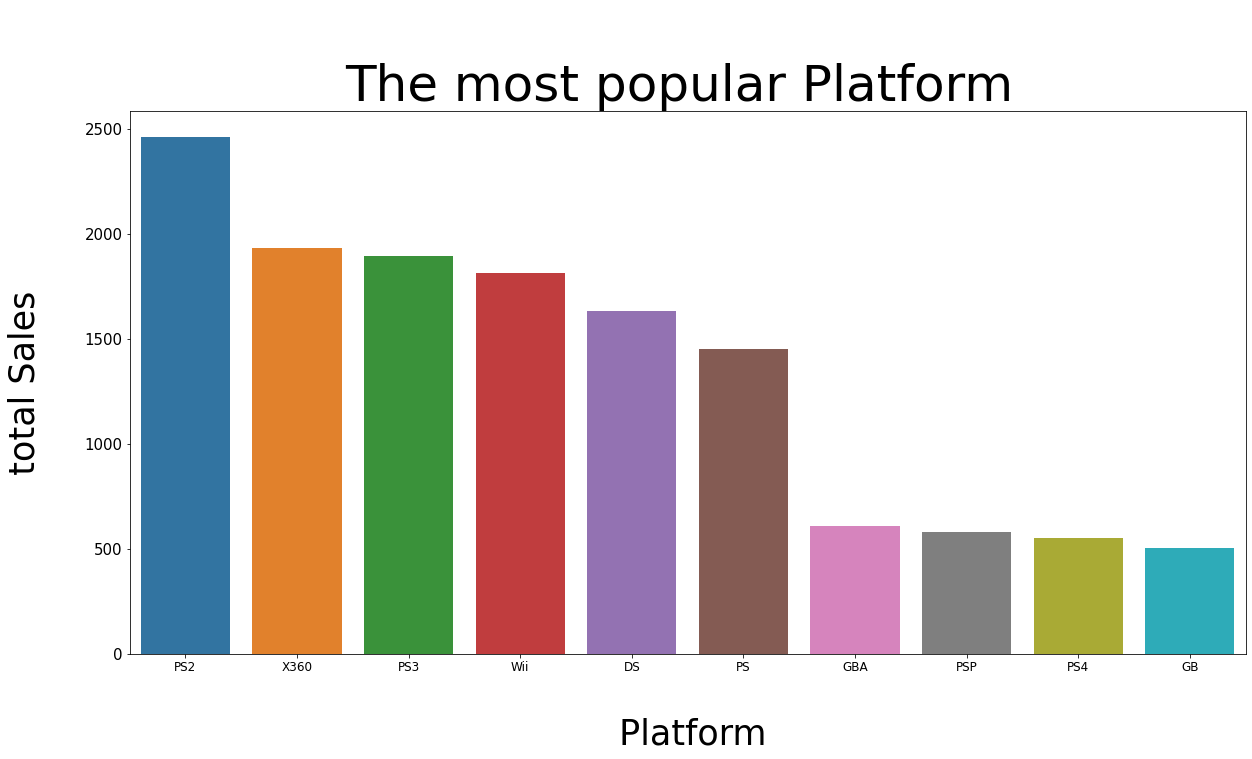

In [44]:
df['Total_sells'] = df.apply(lambda row: row.Global_Sales + row.NA_Sales+row.EU_Sales+row.JP_Sales+row.Other_Sales, axis = 1)
top_pub=df.groupby(['Platform'])['Total_sells'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (20,10))
sns.barplot(y=top_pub["Total_sells"], x=top_pub["Platform"],linewidth=2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel(" total Sales \n", color='black', fontsize=35)
plt.xlabel("\n Platform", color='black', fontsize=35)
plt.title("\nThe most popular Platform ",color='black', fontsize=50)
ax = plt.gca()
plt.show();

Text(0, 0.5, 'platform')

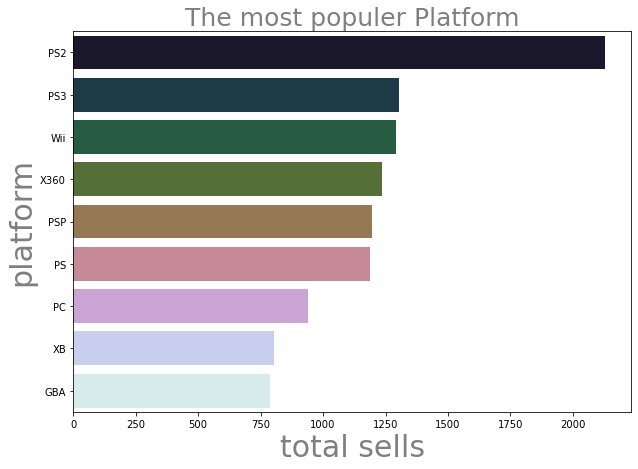

In [45]:
Platform_title = df.Platform.value_counts()
Platform_title = Platform_title[1:10,]
plt.subplots(figsize=(10,7))
ax=sns.barplot(x=Platform_title , y=Platform_title .index,palette='cubehelix')
ax.set_title('The most populer Platform', color='black', alpha=0.5 , size=25)
ax.set_xlabel('total sells',color='black',alpha=0.5, size=30)
ax.set_ylabel('platform',color='black',alpha=0.5,size=30)

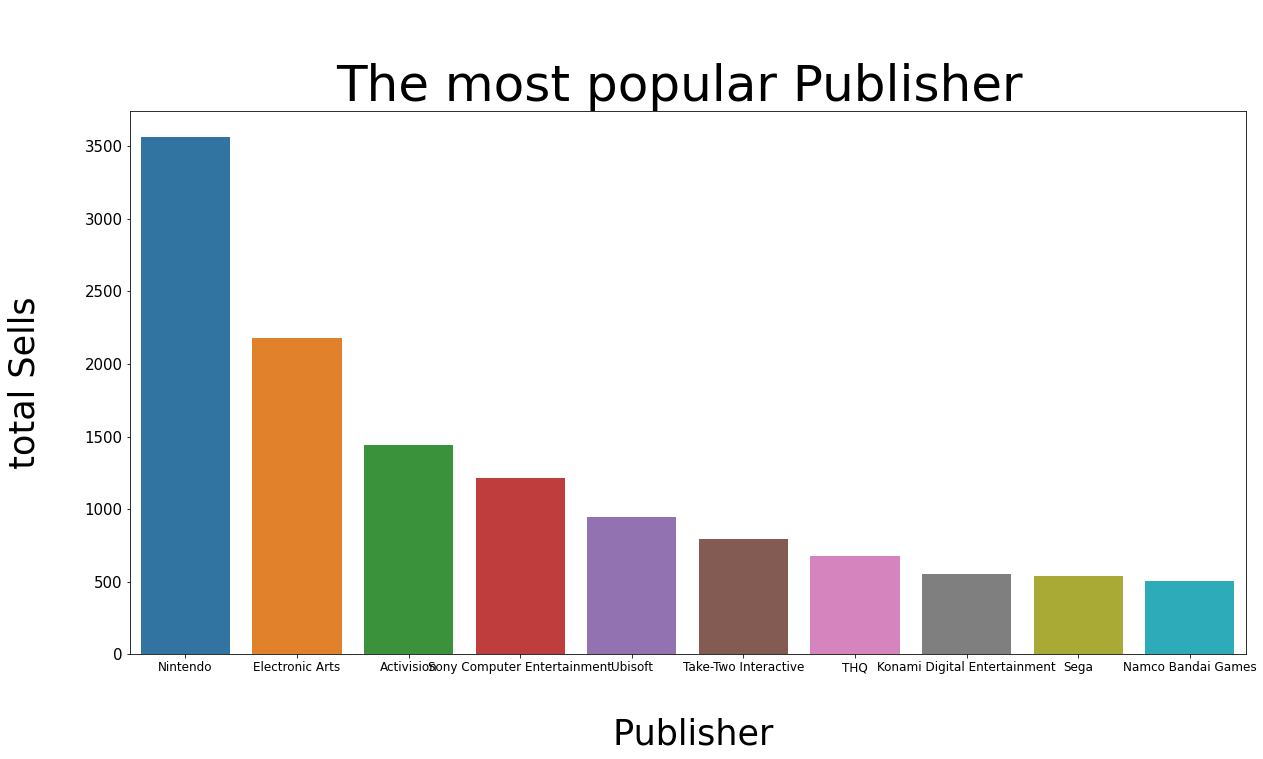

In [46]:
df['Total_sells'] = df.apply(lambda row: row.Global_Sales + row.NA_Sales+row.EU_Sales+row.JP_Sales+row.Other_Sales, axis = 1)
top_pub=df.groupby(['Publisher'])['Total_sells'].sum().sort_values(ascending = False).reset_index().head(10)

plt.figure(figsize = (20,10))
sns.barplot(y=top_pub["Total_sells"], x=top_pub["Publisher"],linewidth=2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel(" total Sells \n", color='black', fontsize=35)
plt.xlabel("\n Publisher", color='black', fontsize=35)
plt.title("\nThe most popular Publisher ",color='black', fontsize=50)
ax = plt.gca()
plt.show();


Text(0, 0.5, 'publisher')

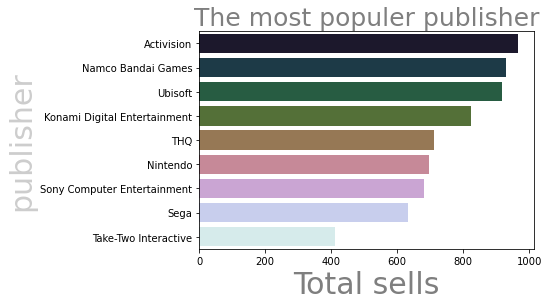

In [47]:
Publisher_title = Publisher_title[:10,]
ax=sns.barplot(x=Publisher_title , y = Publisher_title.index , palette='cubehelix')
ax.set_title('The most populer publisher',color='black',alpha=0.5,size=25)
ax.set_xlabel('Total sells',color='black',alpha=0.5,size=30)
ax.set_ylabel('publisher',color='black',alpha=0.2,size=30)

4- which country have highest sells throwing the years? 

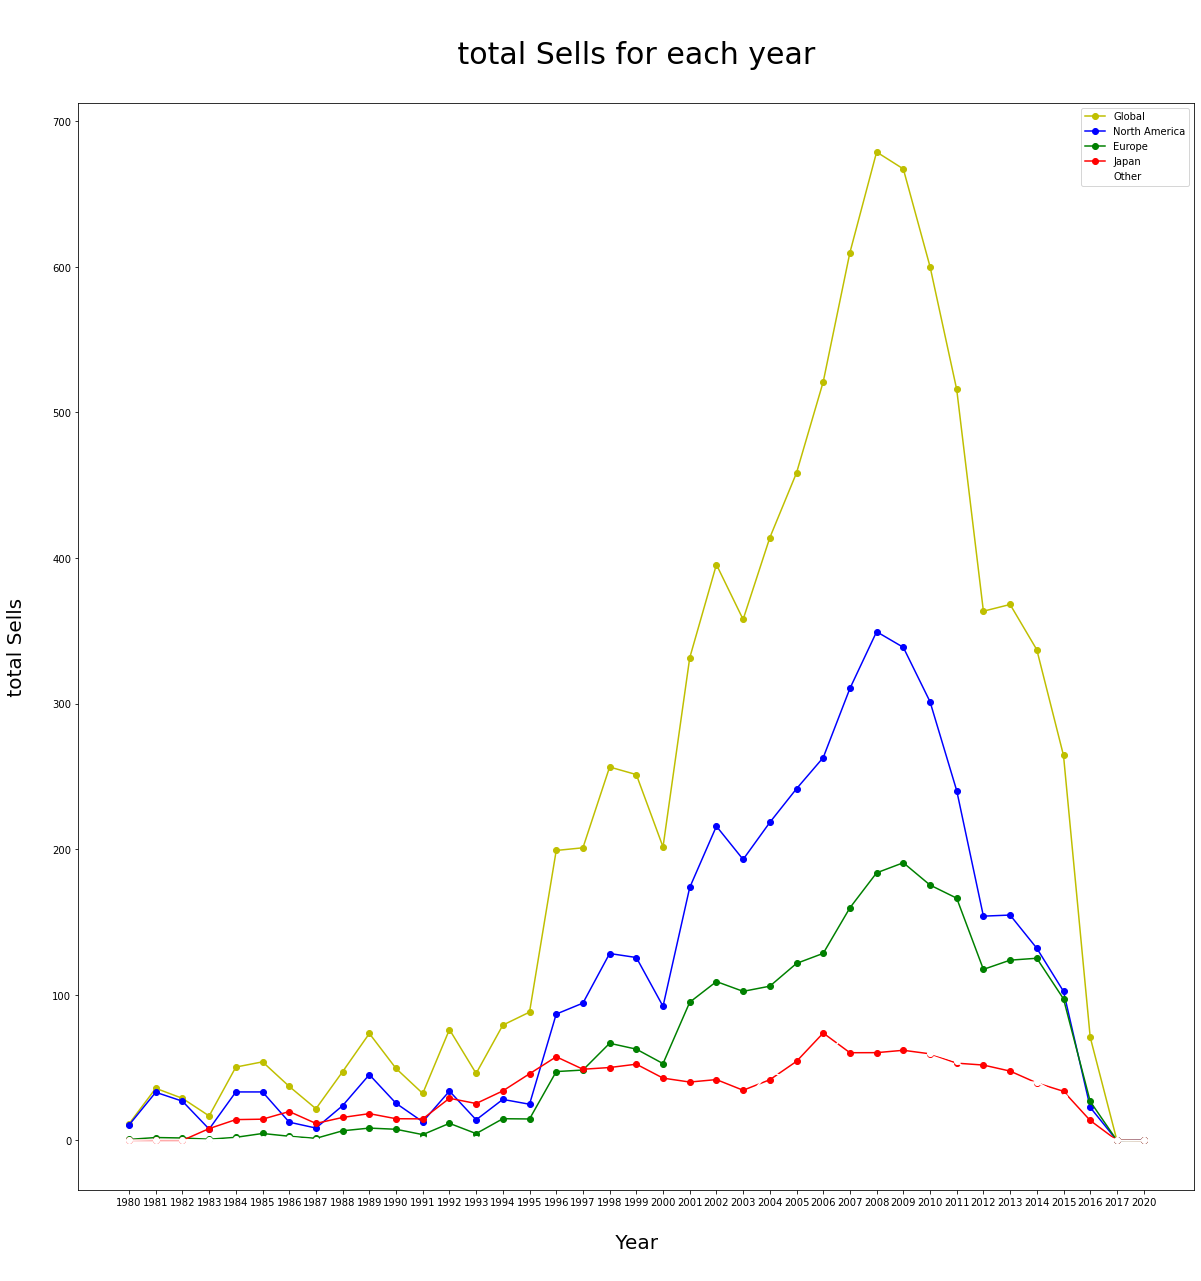

In [48]:
year_df = df.groupby('Year')[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()

plt.figure(figsize=(20,20))

plt.plot(year_df.Global_Sales, 'o-y')
plt.plot(year_df.NA_Sales, 'o-b')
plt.plot(year_df.EU_Sales, 'o-g')
plt.plot(year_df.JP_Sales, 'o-r')
plt.plot(year_df.Other_Sales, 'o-w')


plt.xlabel('\n Year \n',fontsize=20,color='black')
plt.ylabel(' total Sells \n',fontsize=20,color='black')
plt.title('\n total Sells for each year \n',fontsize=30,color='black')
plt.legend(['Global','North America', 'Europe', 'Japan','Other']);

- The most gener of games according to sells :

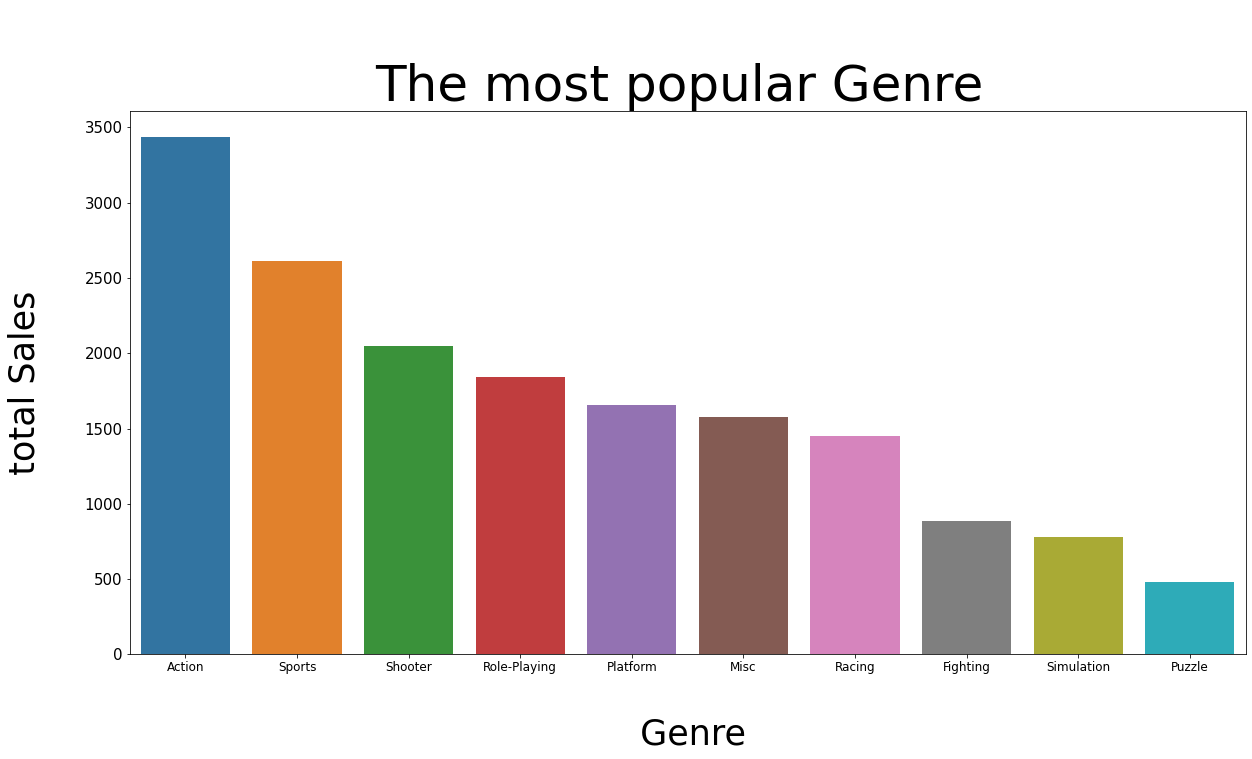

In [49]:
df['Total_sells'] = df.apply(lambda row: row.Global_Sales + row.NA_Sales+row.EU_Sales+row.JP_Sales+row.Other_Sales, axis = 1)
top_pub=df.groupby(['Genre'])['Total_sells'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (20,10))
sns.barplot(y=top_pub["Total_sells"], x=top_pub["Genre"],linewidth=2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel(" total Sales \n", color='black', fontsize=35)
plt.xlabel("\n Genre", color='black', fontsize=35)
plt.title("\nThe most popular Genre ",color='black', fontsize=50)
ax = plt.gca()
plt.show();

-It's (Action) .

- Now let's see which the most pupler games :

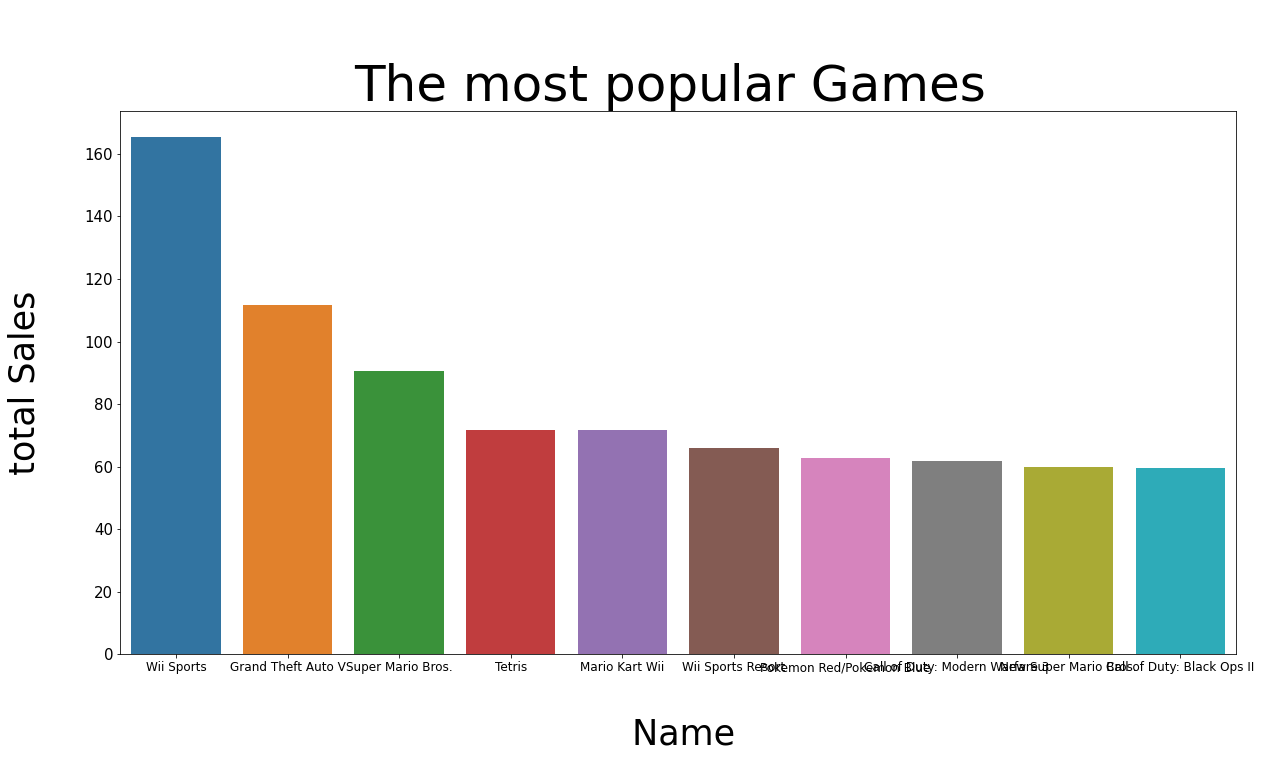

In [50]:
df['Total_sells'] = df.apply(lambda row: row.Global_Sales + row.NA_Sales+row.EU_Sales+row.JP_Sales+row.Other_Sales, axis = 1)
top_pub=df.groupby(['Name'])['Total_sells'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (20,10))
sns.barplot(y=top_pub["Total_sells"], x=top_pub["Name"],linewidth=2)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel(" total Sales \n", color='black', fontsize=35)
plt.xlabel("\n Name", color='black', fontsize=35)
plt.title("\nThe most popular Games ",color='black', fontsize=50)
ax = plt.gca()
plt.show();

It's (wii sport)

I USE THREE MODLE :

- Linear Reression modle :

In [51]:
x= df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Year']]
y= df[['Global_Sales']]

#Splitting into train and test sets for both parameters
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Building the model:
lr = LinearRegression()


# Fit the model on training data:

lr.fit(x_train, y_train)

# Predict the testing data:
lr_predict = lr.predict(x_test)
lr_predict

array([[0.16199471],
       [0.01198951],
       [0.02197687],
       ...,
       [0.19201631],
       [1.20293694],
       [2.38356054]])

In [52]:
#R Squared + MSE 
lr_MSE=mean_squared_error(y_test, lr_predict)
print("LinearRegression MSE:",lr_MSE*100,"\n")


# Show R_Squared on the training data 
train_r2=lr.score(x_train, y_train)
print('R^2 Score trining data:',train_r2 * 100,"%")


# Show R-squared value of the model on the predict data
test_r2=r2_score(y_test, lr_predict)
print('R^2 Score testing data:',test_r2* 100,"%")

LinearRegression MSE: 0.08963151080162801 

R^2 Score trining data: 99.94196606092386 %
R^2 Score testing data: 99.97905353546906 %


In [53]:
a=np.squeeze(y_test)
df1 = pd.DataFrame()
df1["Actual"]=np.squeeze(y_test*100)
df1["Predicted"]=np.squeeze(lr_predict*100)
df1.head()

,Actual,Predicted
8528,16.0,16.199471
16502,1.0,1.198951
15605,2.0,2.197687
13795,4.0,4.197873
5588,32.0,33.224584


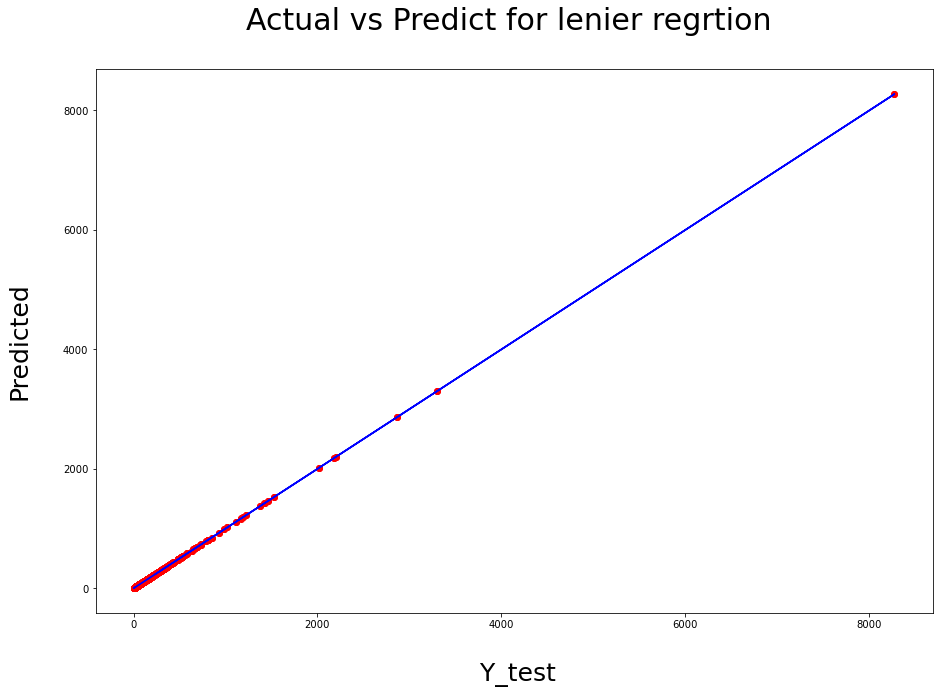

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(df1, df1,color="red")
plt.plot(df1,df1,'-b')
plt.xlabel('\n Y_test', fontsize=25,color = "black")
plt.ylabel('Predicted\n', fontsize=25,color = "black")
plt.title('Actual vs Predict for lenier regrtion \n',fontsize=30,color = "black")
plt.show()

- Decision Tree Regressor modle :

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
DT = DecisionTreeRegressor()


# Fit the model on training data:

DT.fit(x_train, y_train)

# Predict the testing data:
DT_predict = DT.predict(x_test)
DT_predict

array([0.2  , 0.01 , 0.022, ..., 0.19 , 1.1  , 2.27 ])

In [57]:
DT.score(x_test,y_test)

0.7692965291451688

In [58]:
D=np.squeeze(y_test)
df5 = pd.DataFrame()
df5["Actual"]=np.squeeze(y_test*100)
df5["Predicted"]=np.squeeze(DT_predict*100)
df5.head()

,Actual,Predicted
8528,16.0,20.000000
16502,1.0,1.000000
15605,2.0,2.200000
13795,4.0,4.111111
5588,32.0,32.000000


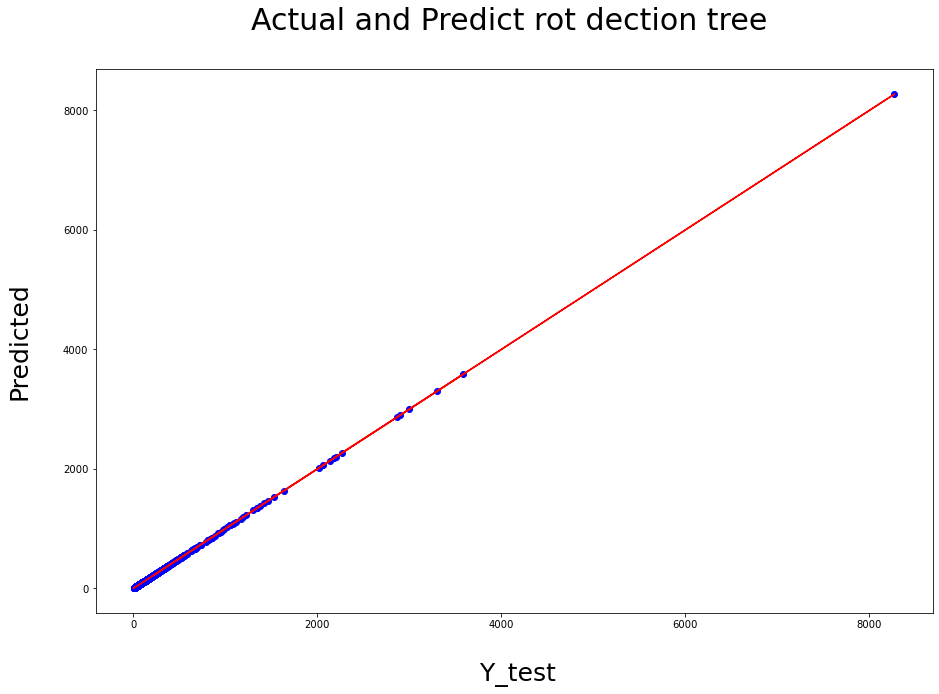

In [59]:
plt.figure(figsize=(15,10))
plt.scatter(df5, df5,color="blue")
plt.plot(df5,df5,'red')
plt.xlabel('\n Y_test', fontsize=25,color = "black")
plt.ylabel('Predicted\n', fontsize=25,color = "black")
plt.title('Actual and Predict rot dection tree \n',fontsize=30,color = "black")
plt.show()

- Random Forest Regressor module :

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
RF= RandomForestRegressor()


# Fit the model on training data:

RF.fit(x_train, y_train)

# Predict the testing data:
RF_predict =RF.predict(x_test)
RF_predict

C:\Users\Shodz\AppData\Local\Temp/ipykernel_1556/3616398461.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


array([0.15673333, 0.01      , 0.02195929, ..., 0.19      , 1.1641    ,
       2.3356    ])

In [62]:
RF.score(x_test,y_test)

0.8211992131729511

In [63]:
a1=np.squeeze(y_test)
df2 = pd.DataFrame()
df2["Actual"]=np.squeeze(y_test*100)
df2["Predicted"]=np.squeeze(RF_predict*100)
df2.head()

,Actual,Predicted
8528,16.0,15.673333
16502,1.0,1.000000
15605,2.0,2.195929
13795,4.0,4.079055
5588,32.0,32.548333


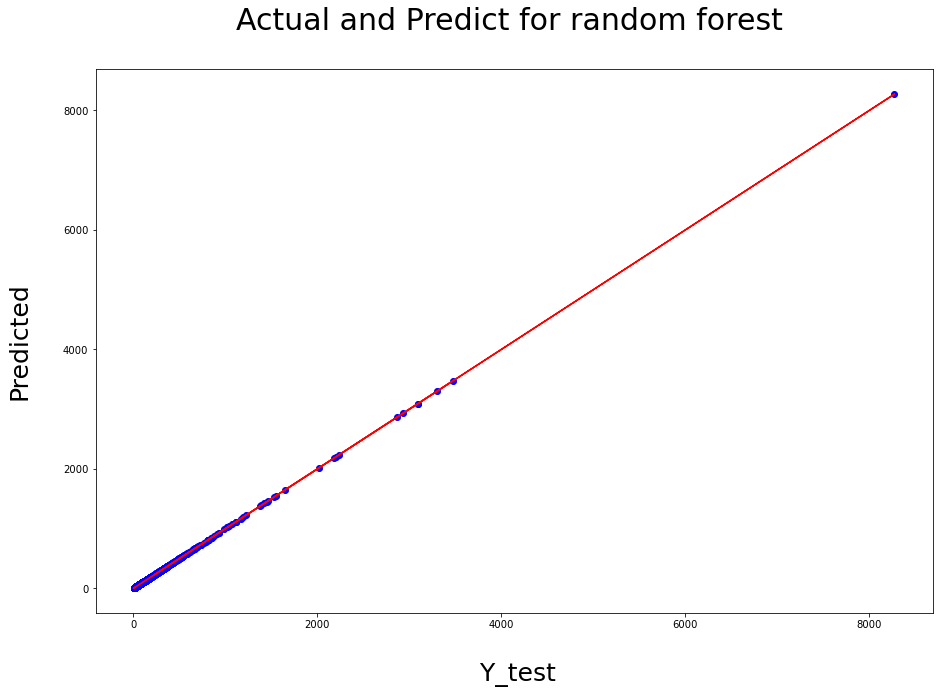

In [64]:
plt.figure(figsize=(15,10))
plt.scatter(df2, df2,color="blue")
plt.plot(df2,df2,'red')
plt.xlabel('\n Y_test', fontsize=25,color = "black")
plt.ylabel('Predicted\n', fontsize=25,color = "black")
plt.title('Actual and Predict for random forest \n',fontsize=30,color = "black")
plt.show()

Conclusions :
•	The computation in the bagging include view country's and tern out to be global level . 
•	The model may will the video games company's to improve the games according to multiple factors to rich as possible gamer they can .
•	The decrease in sells in view last years in general changing when the audience torn in anther platform .
